## Data Visualization for Low Priced Dataset


# 1 Importing Libraries

In [ ]:
%pip install pandas matplotlib seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2 Loading Data

In [ ]:

file_path = #Dataset used: `Low_Priced_Cleaned_df.csv` (place it in the working directory or `data/` folder).

# Loading Data
low_priced_df = pd.read_csv(f'{file_path}\\Low_Priced_Cleaned_df.csv')

In [4]:
low_priced_df.shape

(506162, 15)

# 3 Exploratory Data Analysis



- ### Overview of the dataset and initial insights

In [5]:
print(low_priced_df.describe())


          Invoice_No       Quantity     Unit_Price          Month  \
count  506162.000000  506162.000000  506162.000000  506162.000000   
mean   560036.944646      10.918982       2.624535       7.563825   
std     13413.378103     159.140331       1.931973       3.504511   
min    536365.000000       1.000000       0.420000       1.000000   
25%    547964.000000       1.000000       1.250000       5.000000   
50%    560773.000000       4.000000       2.080000       8.000000   
75%    571883.000000      12.000000       3.750000      11.000000   
max    581587.000000   80995.000000       7.080000      12.000000   

                Year        Quarter     DayOfMonth  Total_Revenue  
count  506162.000000  506162.000000  506162.000000  506162.000000  
mean     2010.922928       2.838773      15.011761      18.607032  
std         0.266706       1.136018       8.659411     267.879191  
min      2010.000000       1.000000       1.000000       0.001000  
25%      2011.000000       2.000000   

In [6]:
# Dropping irrelevant columns
low_priced_df.drop(columns=['Outlier'], inplace=True)

# 4 Identifying and Handling Outliers

In [7]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1_quantity = low_priced_df['Quantity'].quantile(0.25)
Q3_quantity = low_priced_df['Quantity'].quantile(0.75)

# Calculate the IQR
IQR_quantity = Q3_quantity - Q1_quantity

# Define lower and upper limits for outliers
lower_limit_quantity = Q1_quantity - 1.5 * IQR_quantity
upper_limit_quantity = Q3_quantity + 1.5 * IQR_quantity

# Identify outliers
outliers_quantity = low_priced_df[(low_priced_df['Quantity'] < lower_limit_quantity) | (low_priced_df['Quantity'] > upper_limit_quantity)]

# Print results
print(f"Q1: {Q1_quantity}")
print(f"Q3: {Q3_quantity}")
print(f"IQR: {IQR_quantity}")
print(f"Lower Limit: {lower_limit_quantity}")
print(f"Upper Limit: {upper_limit_quantity}")
print(f"Number of Outliers: {outliers_quantity.shape[0]}")

# Capping Outliers in Quantity
low_priced_df['Quantity'] = low_priced_df['Quantity'].clip(lower_limit_quantity, upper_limit_quantity)



Q1: 1.0
Q3: 12.0
IQR: 11.0
Lower Limit: -15.5
Upper Limit: 28.5
Number of Outliers: 26673


<Axes: ylabel='Quantity'>

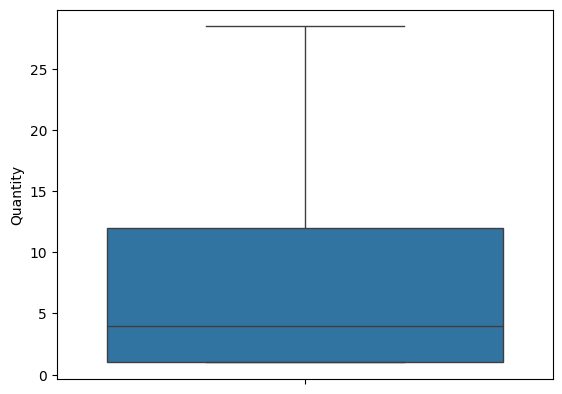

In [8]:
sns.boxplot(low_priced_df.Quantity)

# 5 Creating Function for Plotting

In [9]:
# Creating a function for Plots
def plot_data(data, plot_type='bar', x_col=None, y_col=None, hue=None, title='', xlabel='', ylabel='', figsize=(10, 6), rotation=0):
    """
    A generic function to plot different types of plots using Matplotlib and Seaborn.

    Parameters:
    - data: DataFrame to plot
    - plot_type: Type of plot ('bar', 'line', 'hist', etc.)
    - x_col: Column name for x-axis
    - y_col: Column name for y-axis
    - hue: Column name for grouping in categorical plots
    - title: Plot title
    - xlabel: x-axis label
    - ylabel: y-axis label
    - figsize: Tuple specifying the figure size
    - rotation: Rotation angle for x-axis labels
    """
   
    # Create plot based on specified plot_type
    plt.figure(figsize=figsize)
    
    if plot_type == 'bar':
        sns.barplot(data=data, x=x_col, y=y_col, hue=hue)
    elif plot_type == 'line':
        sns.lineplot(data=data, x=x_col, y=y_col, hue=hue)
    elif plot_type == 'hist':
        sns.histplot(data[x_col], kde=True, bins=10)
    else:
        print("Plot type not recognized.")
        return
    
    # Set titles and labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Rotate x-axis labels
    if x_col:
        plt.xticks(rotation=rotation)
    
    # Show plot
    plt.show()

# 6 Correlation

In [10]:
low_priced_df[['Quantity','Unit_Price','Total_Revenue','Month','Year','Quarter','DayOfMonth',]].corr()

,Quantity,Unit_Price,Total_Revenue,Month,Year,Quarter,DayOfMonth
Quantity,1.000000,-0.361781,0.085846,-0.014047,0.036955,-0.015141,0.003730
Unit_Price,-0.361781,1.000000,0.014280,-0.012854,-0.047146,-0.019215,-0.001770
Total_Revenue,0.085846,0.014280,1.000000,0.000216,0.001242,-0.000444,-0.001646
Month,-0.014047,-0.012854,0.000216,1.000000,-0.365802,0.972934,-0.117778
Year,0.036955,-0.047146,0.001242,-0.365802,1.000000,-0.295391,0.164983
Quarter,-0.015141,-0.019215,-0.000444,0.972934,-0.295391,1.000000,-0.093613
DayOfMonth,0.003730,-0.001770,-0.001646,-0.117778,0.164983,-0.093613,1.000000


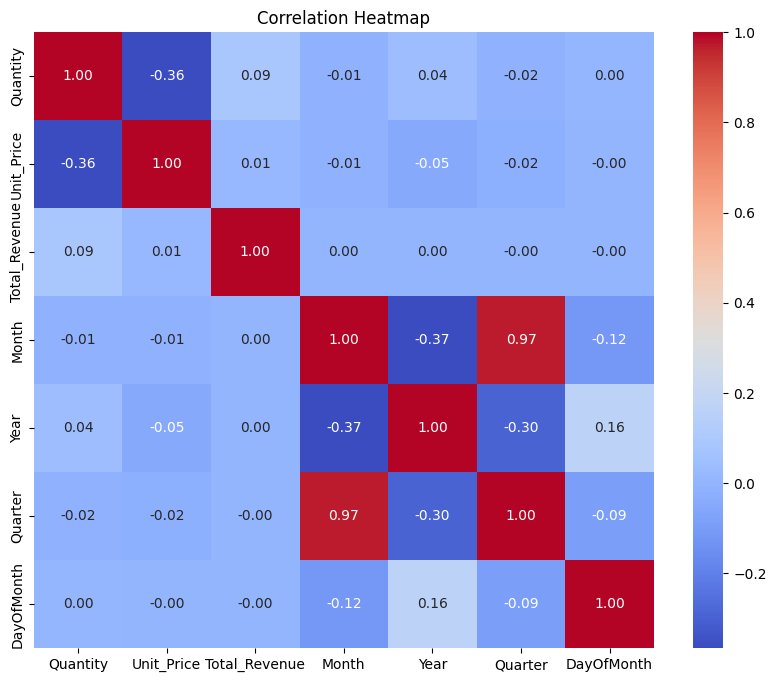

In [11]:
# Plot the heatmap
correlation_matrix = low_priced_df[['Quantity','Unit_Price','Total_Revenue','Month','Year','Quarter','DayOfMonth']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

There is  no correlation between any of the attributes


# 7 Summary KPIs
- Total Revenue
- Total Quantity Sold
- Average Unit Price
- Top-selling Month/Year

In [12]:
total_revenue = low_priced_df['Total_Revenue'].sum()
total_quantity = low_priced_df['Quantity'].sum()
avg_unit_price = low_priced_df['Unit_Price'].mean()
top_selling_month = low_priced_df['Month'].value_counts().idxmax()
top_low_price_product = low_priced_df['Description'].value_counts().idxmax()

print(f'Total Revenue in 2011: {total_revenue:,.2f}')
print(f"Total Quantity Sold in 2011: {total_quantity:,.2f}")
print(f"Average Unit Price: {avg_unit_price:.2f}")
print(f"Top Selling Month in 2011: {top_selling_month}")
print(f"Top Low Priced Product of 2011: {top_low_price_product}")

Total Revenue in 2011: 9,418,172.38
Total Quantity Sold in 2011: 3,659,861.50
Average Unit Price: 2.62
Top Selling Month in 2011: 11
Top Low Priced Product of 2011: WHITE HANGING HEART T-LIGHT HOLDER


# 8 Analysis for Revenue and Quantity over Time


- ### Cumulative Revenue

In [13]:
# low_priced_df['Cumulative_Revenue'] = low_priced_df['Total_Revenue'].cumsum()

# sampled_df = low_priced_df[::100]  # Take every 10th row
# sns.lineplot(x='Date', y='Cumulative_Revenue', data=sampled_df)

- ### Monthly Trends in Revenue and Quantity sold

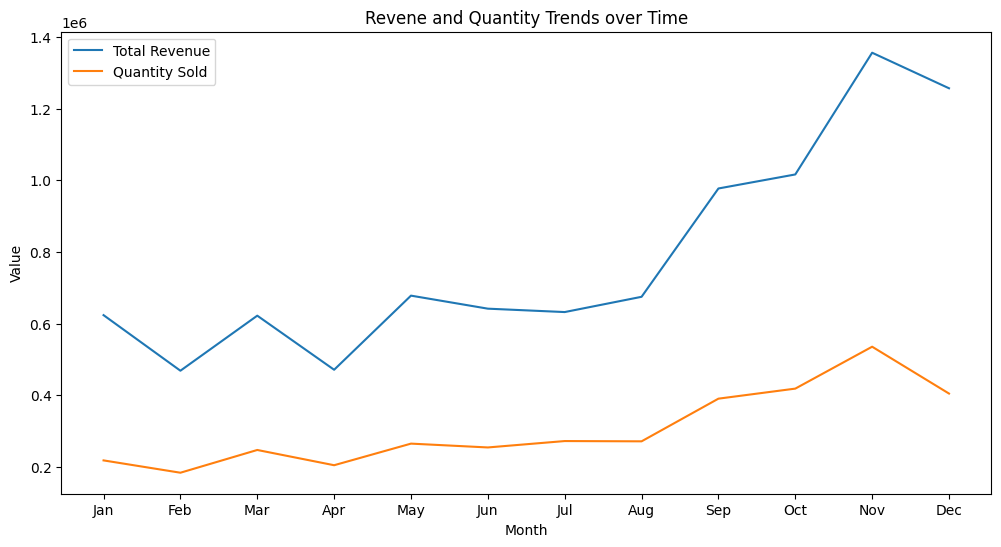

In [14]:
# Aggregate Data by Month
monthly_data = low_priced_df.groupby('Month').agg({'Total_Revenue':'sum','Quantity':'sum'}).reset_index()

# Plot the Trends
plt.figure(figsize=(12, 6))

sns.lineplot(data=monthly_data, x='Month', y='Total_Revenue', label='Total Revenue')
sns.lineplot(data=monthly_data, x='Month', y='Quantity', label='Quantity Sold')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.title('Revene and Quantity Trends over Time')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend()
plt.show()

So the growth rate start from August and goes till November. We see a little decline in December. So our best Month is November.

- ### Monthly Revenue Growth over Time

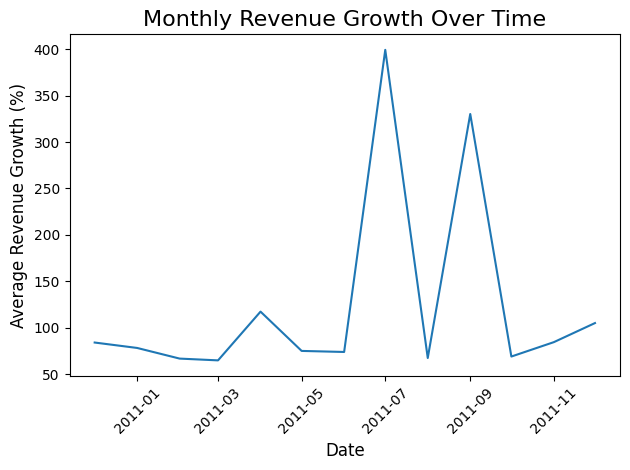

In [15]:
# Convert 'Date' column to datetime format if not already
low_priced_df['Date'] = pd.to_datetime(low_priced_df['Date'], errors='coerce')

# Drop rows with invalid dates (if any)
low_priced_df = low_priced_df.dropna(subset=['Date'])

low_priced_df['Revenue_Growth'] = low_priced_df['Total_Revenue'].pct_change() * 100

# Group by month and calculate the average revenue growth
monthly_data = (
    low_priced_df.groupby(low_priced_df['Date'].dt.to_period('M'))['Revenue_Growth']
    .mean()
    .reset_index()
)
monthly_data['Date'] = monthly_data['Date'].dt.to_timestamp()  # Convert to timestamp for plotting

# Plot the monthly revenue growth
sns.lineplot(x='Date', y='Revenue_Growth', data=monthly_data)
plt.title('Monthly Revenue Growth Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Revenue Growth (%)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()


- ### Average Monthly Revenue per Unit Over Time

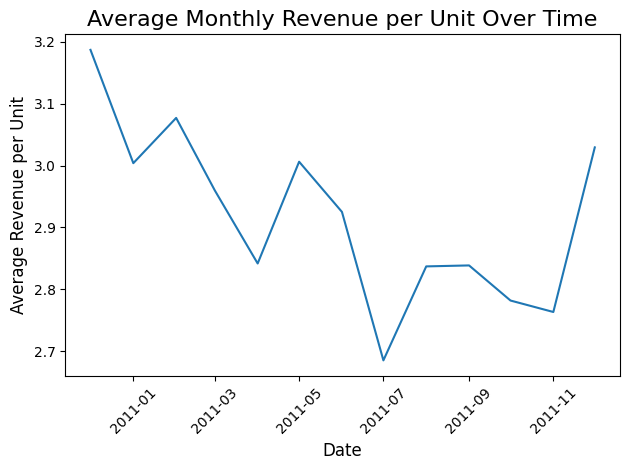

In [16]:
# Creating Revenue pe Unit Column
low_priced_df['Revenue_per_Unit'] = low_priced_df['Total_Revenue'] / low_priced_df['Quantity']

# Group by month and calculate the average Revenue per Unit
monthly_revenue_per_unit = (
    low_priced_df.groupby(low_priced_df['Date'].dt.to_period('M'))['Revenue_per_Unit']
    .mean()
    .reset_index()
)
monthly_revenue_per_unit['Date'] = monthly_revenue_per_unit['Date'].dt.to_timestamp()  # Convert to timestamp for plotting

# Plot the monthly Revenue per Unit
sns.lineplot(x='Date', y='Revenue_per_Unit', data=monthly_revenue_per_unit)
plt.title('Average Monthly Revenue per Unit Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Revenue per Unit', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()


- ### Quarterly Trends Analysis

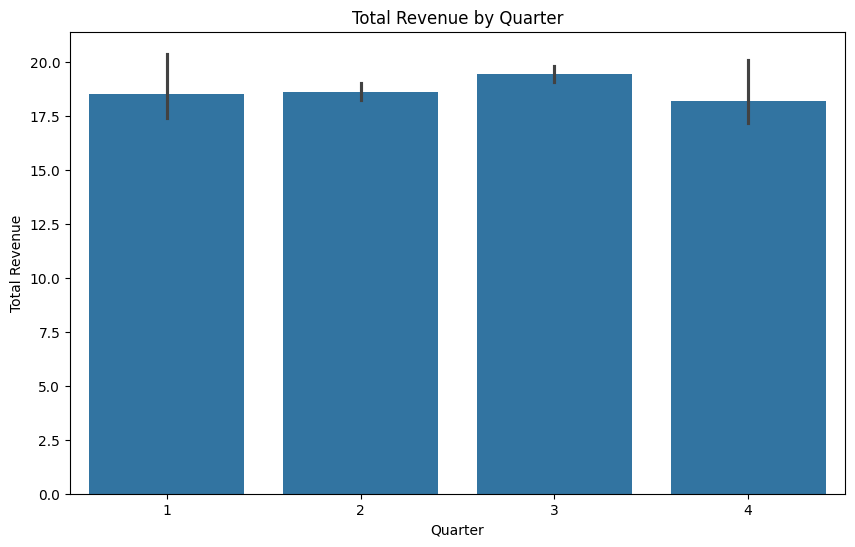

In [17]:
quarterly_data = low_priced_df.groupby('Quarter').agg({'Total_Revenue':'sum'}).reset_index()
plot_data(data=low_priced_df,
          plot_type='bar',
          x_col='Quarter',
          y_col='Total_Revenue',
          title="Total Revenue by Quarter",
          xlabel="Quarter",
          ylabel="Total Revenue"
          )


As you can see we dont see much difference between quarters. Overall Revenue thoughout the year is balnaced and ideal.

# 9 Revenue by Region

- ### Top 10 Region by Revenue

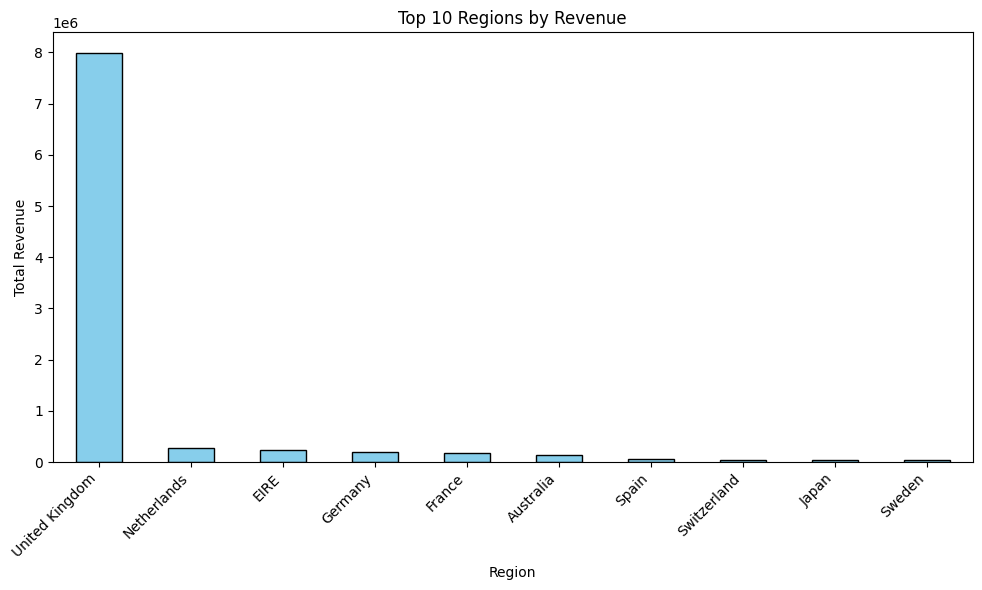

In [18]:
import matplotlib.pyplot as plt

# Calculate top 10 regions by revenue
top_10_regions = low_priced_df.groupby('Country')['Total_Revenue'].sum().nlargest(10)

# Plot the result
plt.figure(figsize=(10, 6))
top_10_regions.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Top 10 Regions by Revenue")
plt.xlabel("Region")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45, ha='right')  # Rotate region names for better readability
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()


Best Product in UK

In [ ]:
low_priced_df['Country'] = low_priced_df['Country'].str.strip()
uk = low_priced_df[low_priced_df['Country']=='United Kingdom'].copy()
uk.shape

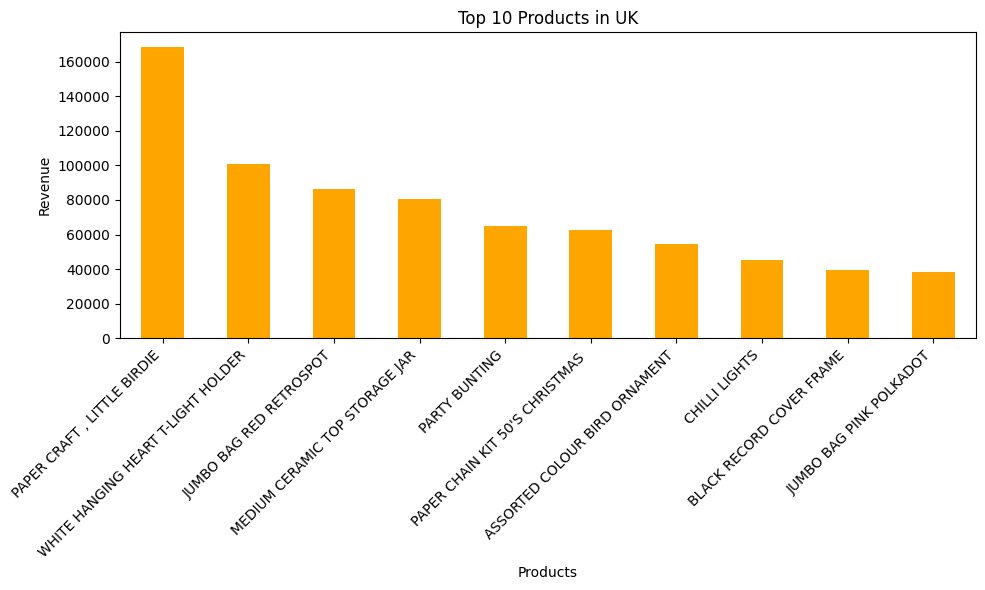

In [71]:
top_10_products_in_uk = uk.groupby('Description')['Total_Revenue'].sum().nlargest(10)

plt.figure(figsize=(10, 6))
top_10_products_in_uk.plot(kind='bar', color='orange')
plt.title('Top 10 Products in UK')
plt.xlabel('Products')
plt.ylabel('Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


- ### Least Revenue Generating Regions

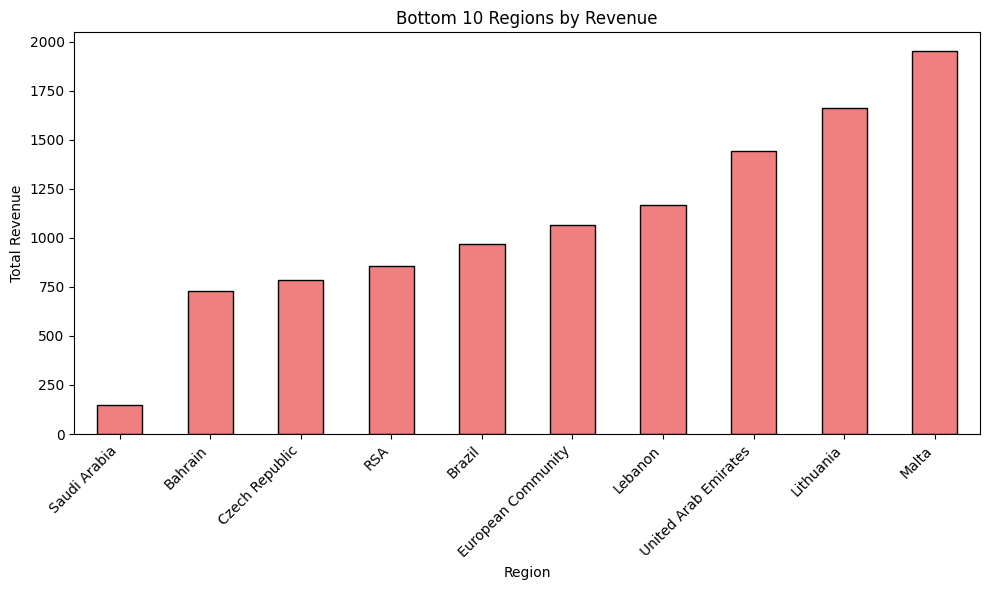

In [19]:
import matplotlib.pyplot as plt

# Calculate bottom 10 regions by revenue
bottom_10_regions = low_priced_df.groupby('Country')['Total_Revenue'].sum().nsmallest(10)

# Plot the result
plt.figure(figsize=(10, 6))
bottom_10_regions.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title("Bottom 10 Regions by Revenue")
plt.xlabel("Region")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45, ha='right')  # Rotate region names for better readability
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()


# 10 Distribution of Prices

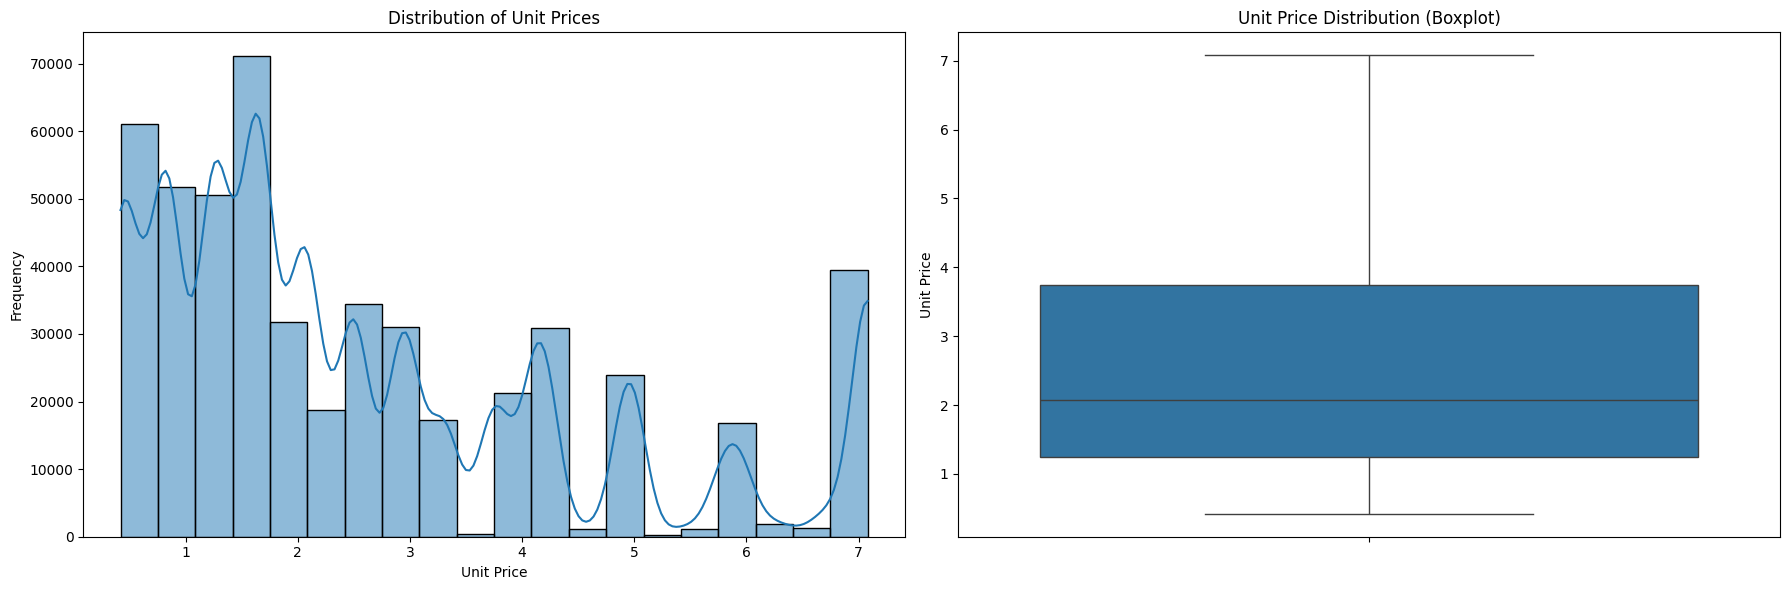

In [20]:
# Create a figure with 1 row and 2 columns
plt.figure(figsize=(18, 6))

# Histogram for unit price
plt.subplot(1, 2, 1)  # (rows, columns, index)
sns.histplot(low_priced_df['Unit_Price'], bins=20, kde=True)
plt.title("Distribution of Unit Prices")
plt.xlabel("Unit Price")
plt.ylabel("Frequency")

# Boxplot for unit price
plt.subplot(1, 2, 2)  # (rows, columns, index)
sns.boxplot(data=low_priced_df, y='Unit_Price')
plt.title("Unit Price Distribution (Boxplot)")
plt.ylabel("Unit Price")

plt.tight_layout()  # Adjust layout
plt.show()



- Highest frequency is observed around the unit price of 2, with the frequency slightly above 70,000.
- Noticeable peaks can be observed at unit prices 1, 2,4 and 7.
- Frequency generally decreases as the unit price inceases, with same fluctuations.

# 11 Top Selling Products or Categories

- ### Total Products

In [21]:
print('Total Products:', low_priced_df['Description'].nunique())
print('Total Products:', low_priced_df['Stock_Code'].nunique())


Total Products: 3904
Total Products: 3792


- ### Top 10 Selling Products by Revenue

C:\Users\ghazi\AppData\Local\Temp\ipykernel_7080\2839690147.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='Total_Revenue', y='Description', palette='viridis')


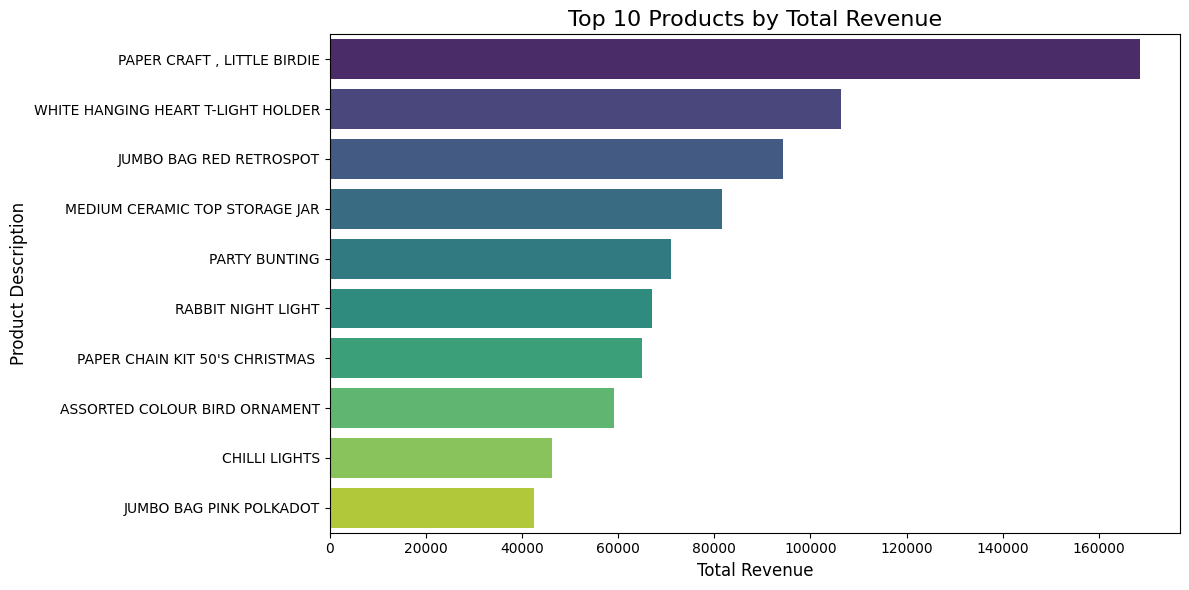

In [22]:
# Group data by 'Description' or 'Stock_Code' to calculate key metrics
product_comparison = (
    low_priced_df.groupby('Description').agg({
        'Quantity': 'sum',  # Total quantity sold
        'Total_Revenue': 'sum',  # Total revenue
        'Revenue_per_Unit': 'mean'  # Average revenue per unit
    })
    .reset_index()
    .sort_values(by='Total_Revenue', ascending=False)  # Sort by total revenue
)

# Plot the top 10 products based on revenue
top_products = product_comparison.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_products, x='Total_Revenue', y='Description', palette='viridis')
plt.title('Top 10 Products by Total Revenue', fontsize=16)
plt.xlabel('Total Revenue', fontsize=12)
plt.ylabel('Product Description', fontsize=12)
plt.tight_layout()
plt.show()


In [23]:
top_products 


,Description,Quantity,Total_Revenue,Revenue_per_Unit
2303,"PAPER CRAFT , LITTLE BIRDIE",28.5,168469.60,5911.214035
3726,WHITE HANGING HEART T-LIGHT HOLDER,21856.5,106292.77,3.871365
1755,JUMBO BAG RED RETROSPOT,22421.5,94340.05,3.258187
1973,MEDIUM CERAMIC TOP STORAGE JAR,2445.5,81700.92,12.510401
2328,PARTY BUNTING,10876.5,71041.01,5.439377
2650,RABBIT NIGHT LIGHT,12465.0,66964.99,3.696281
2297,PAPER CHAIN KIT 50'S CHRISTMAS,11519.5,64952.29,4.157071
215,ASSORTED COLOUR BIRD ORNAMENT,21698.0,59094.93,2.245400
718,CHILLI LIGHTS,5655.0,46290.12,6.591083
1753,JUMBO BAG PINK POLKADOT,10750.0,42436.24,3.131571


- ### Top Selling Product by Quantity

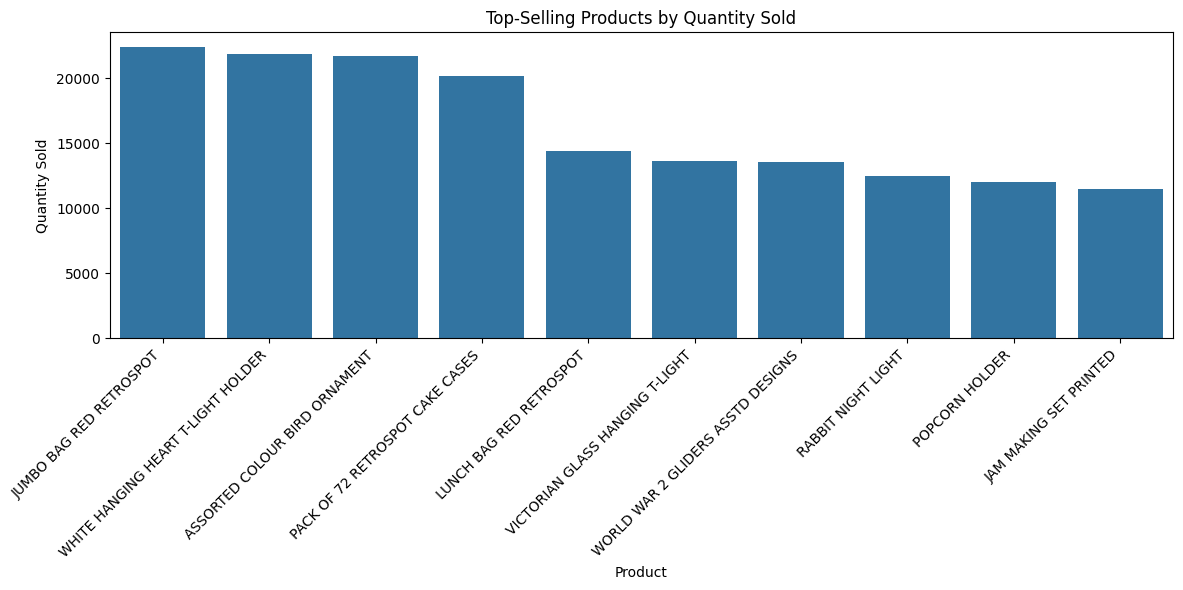

In [24]:
# Group by 'Description' and sum the 'quantitySold' for each product
top_selling_products = low_priced_df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Plot the top-selling products
plt.figure(figsize=(12, 6))
sns.barplot(x=top_selling_products.index, y=top_selling_products.values)

# Correctly align the x-axis labels
plt.title("Top-Selling Products by Quantity Sold")
plt.xlabel("Product")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45, ha='right')  # Ensure proper alignment

plt.tight_layout()  # To ensure no label gets cut off
plt.show()


- ### Least Selling Products by Quantity Sold

Total number of items which sold ONCE in a year: 64


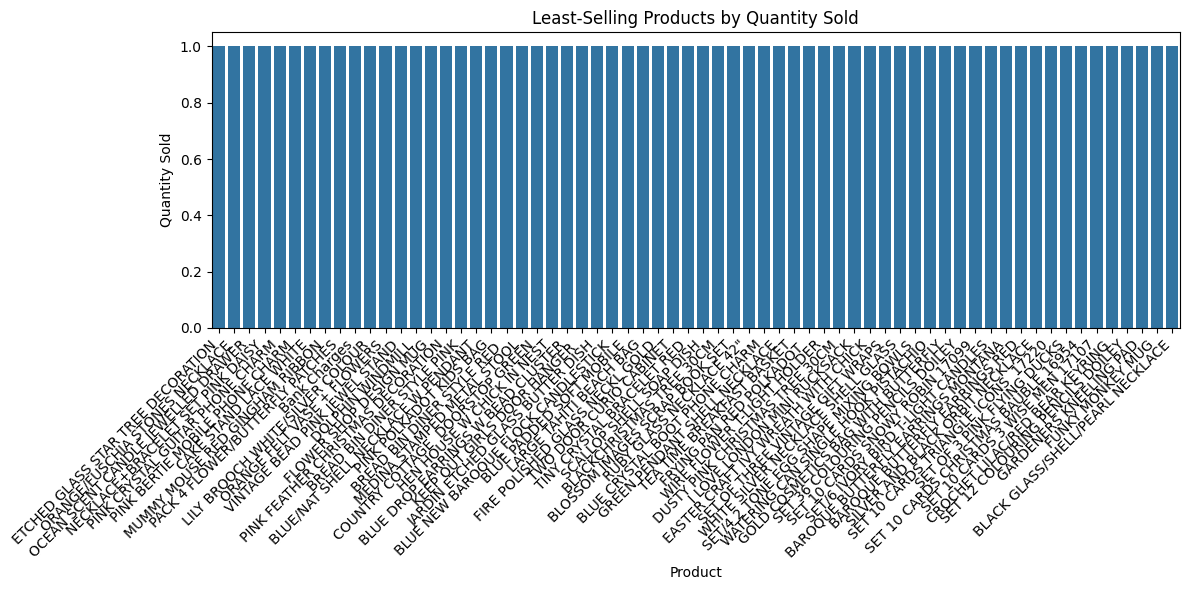

In [25]:
# Group by 'Description' and sum the 'quantitySold' for each product
least_selling_products = low_priced_df.groupby('Description')['Quantity'].sum().sort_values(ascending=True).head(64)
print('Total number of items which sold ONCE in a year:',least_selling_products.shape[0])
# Plot the top-selling products
plt.figure(figsize=(12, 6))
sns.barplot(x=least_selling_products.index, y=least_selling_products.values)

# Correctly align the x-axis labels
plt.title("Least-Selling Products by Quantity Sold")
plt.xlabel("Product")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45, ha='right')  # Ensure proper alignment

plt.tight_layout()  # To ensure no label gets cut off
plt.show()

In [46]:
least_selling_products.head(50)

Description
ETCHED GLASS STAR TREE DECORATION      1.0
ORANGE/FUSCHIA STONES NECKLACE         1.0
OCEAN SCENT CANDLE JEWELLED DRAWER     1.0
NECKLACE+BRACELET SET PINK DAISY       1.0
PINK CRYSTAL GUITAR PHONE CHARM        1.0
PINK BERTIE MOBILE PHONE CHARM         1.0
CAKE STAND LACE WHITE                  1.0
MUMMY MOUSE RED GINGHAM RIBBON         1.0
PACK 4 FLOWER/BUTTERFLY PATCHES        1.0
Bank Charges                           1.0
LILY BROOCH WHITE/SILVER COLOUR        1.0
ORANGE FELT VASE + FLOWERS             1.0
VINTAGE BEAD PINK JEWEL STAND          1.0
DOLPHIN WINDMILL                       1.0
FLOWER SHOP DESIGN MUG                 1.0
PINK FEATHER CHRISTMAS DECORATION      1.0
BREAD BIN DINER STYLE PINK             1.0
BLUE/NAT SHELL NECKLACE W PENDANT      1.0
PINK POLKADOT KIDS BAG                 1.0
BREAD BIN DINER STYLE RED              1.0
MEDINA STAMPED METAL STOOL             1.0
COUNTRY COTTAGE  DOORSTOP GREEN        1.0
HEN HOUSE W CHICK IN NEST              1.0

- ### Top 10 Products by Average Revenue per Unit

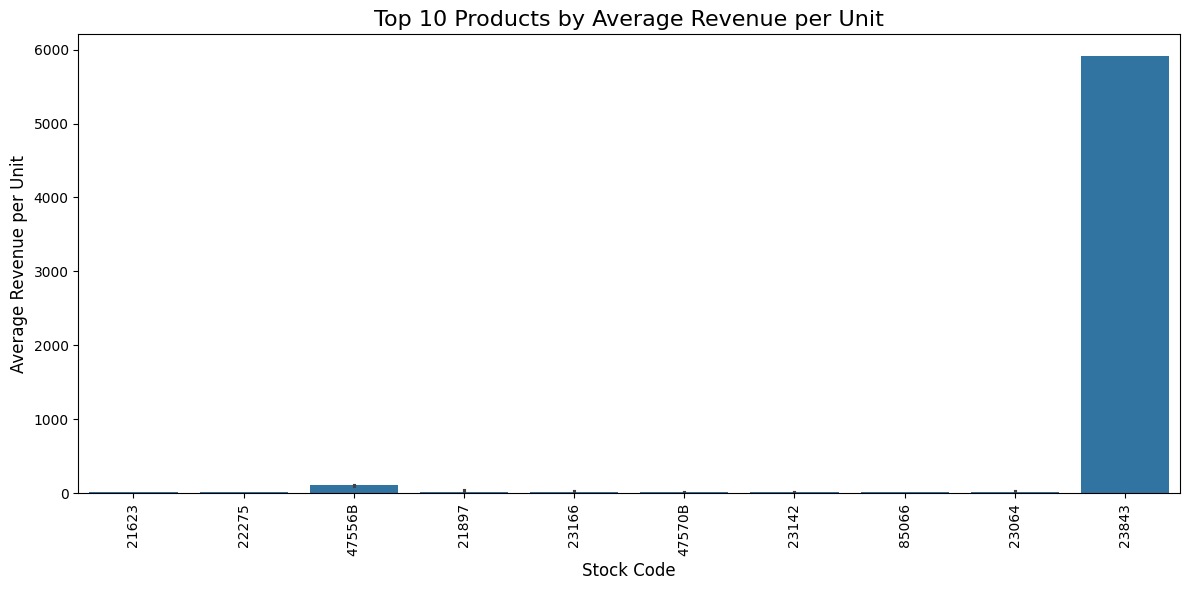

In [27]:
# Calculate Revenue per Unit and add it as a new column
low_priced_df['Revenue_per_Unit'] = low_priced_df['Total_Revenue'] / low_priced_df['Quantity']

# Get top 10 products by average revenue per unit
top_products = (low_priced_df.groupby('Stock_Code')['Revenue_per_Unit']
                .mean()
                .nlargest(10)
                .index)

# Filter the dataframe for these top products
top_products_df = low_priced_df[low_priced_df['Stock_Code'].isin(top_products)]

# Plot the top products
plt.figure(figsize=(12, 6))
sns.barplot(x='Stock_Code', y='Revenue_per_Unit', data=top_products_df, estimator='mean')

plt.title('Top 10 Products by Average Revenue per Unit', fontsize=16)
plt.xlabel('Stock Code', fontsize=12)
plt.ylabel('Average Revenue per Unit', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [28]:
filtered_df = low_priced_df[low_priced_df['Stock_Code'] == '23843'][['Description', 'Stock_Code']]
print('Number 1 Product by Average Revenue per Unit:',filtered_df)


Number 1 Product by Average Revenue per Unit:                         Description Stock_Code
504808  PAPER CRAFT , LITTLE BIRDIE      23843


- ### Revenue by Product Age

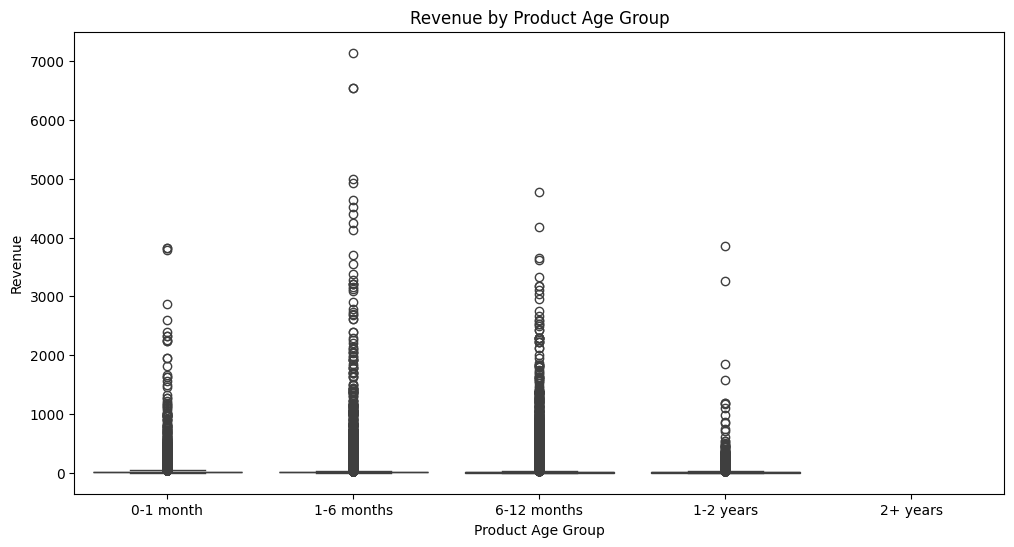

In [29]:
low_priced_df['Launch_Date'] = low_priced_df.groupby('Description')['Date'].transform('min')
low_priced_df['Product_Age'] = (low_priced_df['Date'] - low_priced_df['Launch_Date']).dt.days

# Create age bins for products
bins = [0, 30, 180, 365, 730, 1095]  # Bins for 0-1 month, 1-6 months, 6-12 months, 1-2 years, 2+ years
labels = ['0-1 month', '1-6 months', '6-12 months', '1-2 years', '2+ years']
low_priced_df['Product_Age_Group'] = pd.cut(low_priced_df['Product_Age'], bins=bins, labels=labels)

# Plot the boxplot for product age groups
plt.figure(figsize=(12,6))
sns.boxplot(x='Product_Age_Group', y='Total_Revenue', data=low_priced_df)
plt.title('Revenue by Product Age Group')
plt.xlabel('Product Age Group')
plt.ylabel('Revenue')
plt.show()


# 12 Customer Segmentation

- ### Average Revenue per Customer

Revenue per Customer: 2181.14


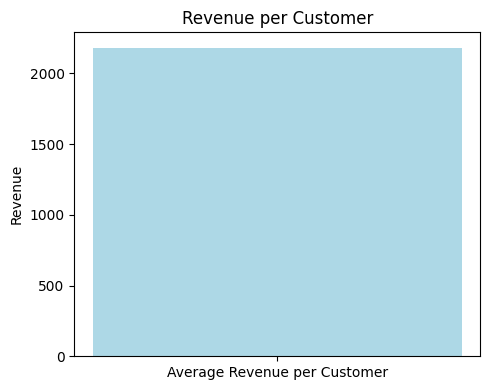

In [30]:

revenue_per_customer = low_priced_df['Total_Revenue'].sum() / low_priced_df['Customer_ID'].nunique()

# Print revenue per customer for reference
print(f"Revenue per Customer: {revenue_per_customer:.2f}")

# Plotting the Revenue per Customer
fig, ax = plt.subplots(figsize=(5, 4))

# Plotting Revenue per Customer as a bar
ax.bar(['Average Revenue per Customer'], [revenue_per_customer], color='lightblue')

# Titles and labels
ax.set_title('Revenue per Customer')
ax.set_ylabel('Revenue')

# Display plot
plt.tight_layout()
plt.show()

- ### Revenue by Customer Segmentation

Text(0.5, 1.0, 'Revenue by Customer Segmentation')

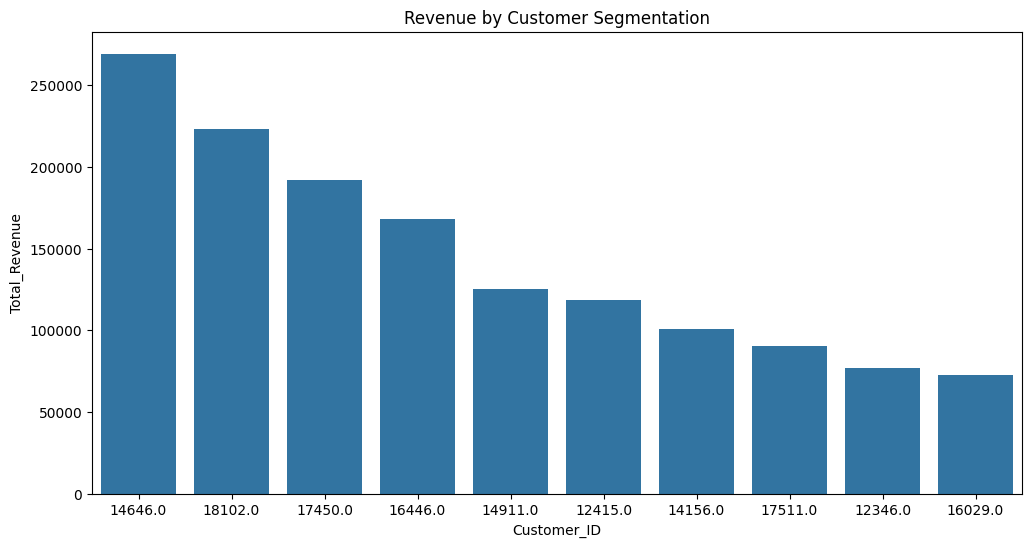

In [31]:
cus_seg = low_priced_df[low_priced_df['Customer_ID']!='Unknown']\
.groupby('Customer_ID')\
.agg({'Total_Revenue':'sum'})\
.reset_index()\
.sort_values(by='Total_Revenue',ascending=False)\
.head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='Customer_ID', y='Total_Revenue', data=cus_seg)
plt.title('Revenue by Customer Segmentation')

- ### Customer Liftime Value (CLV)

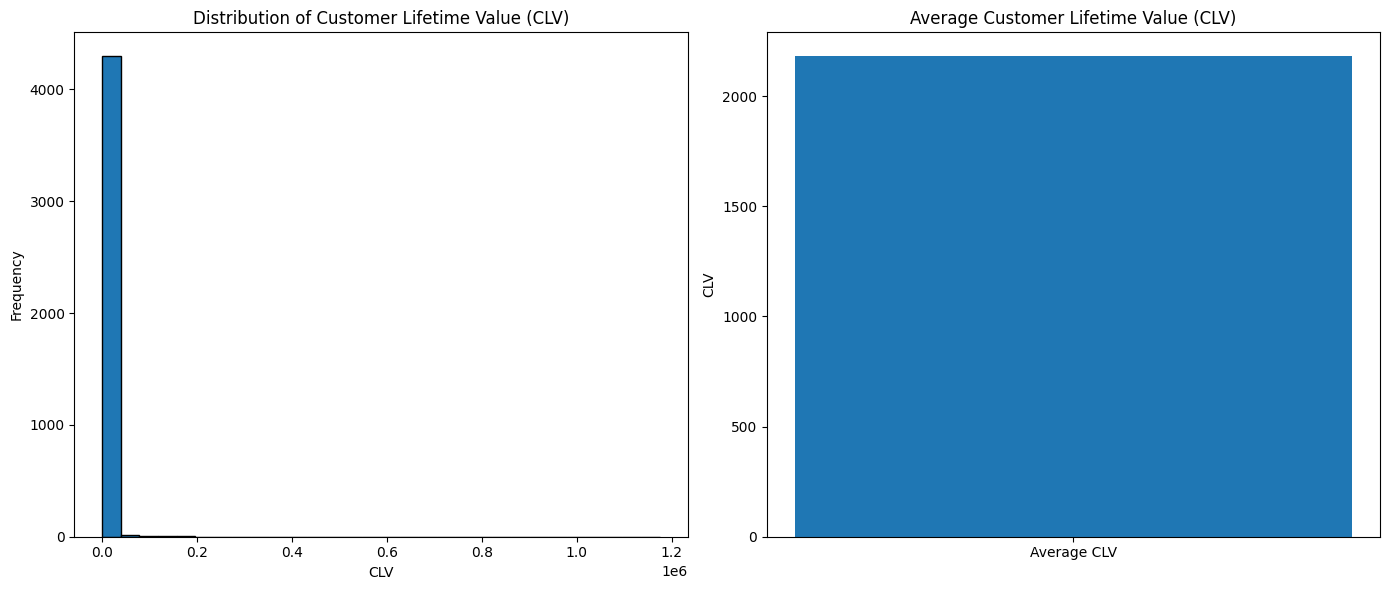

In [32]:
clv = low_priced_df.groupby('Customer_ID')['Total_Revenue'].sum()
clv_total = clv.mean()


# Plotting the CLV distribution (Histogram) and Average CLV (Bar plot) side by side
fig, ax = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Histogram for CLV distribution
ax[0].hist(clv, bins=30, edgecolor='black')
ax[0].set_title('Distribution of Customer Lifetime Value (CLV)')
ax[0].set_xlabel('CLV')
ax[0].set_ylabel('Frequency')

# Bar plot for Average CLV
ax[1].bar(['Average CLV'], [clv_total])
ax[1].set_title('Average Customer Lifetime Value (CLV)')
ax[1].set_ylabel('CLV')

plt.tight_layout()  # Adjusts spacing between plots
plt.show()


- ### Customer Retention Rate

Customer Retention Rate: 98.38%
Customer Non-Retention Rate: 1.62%


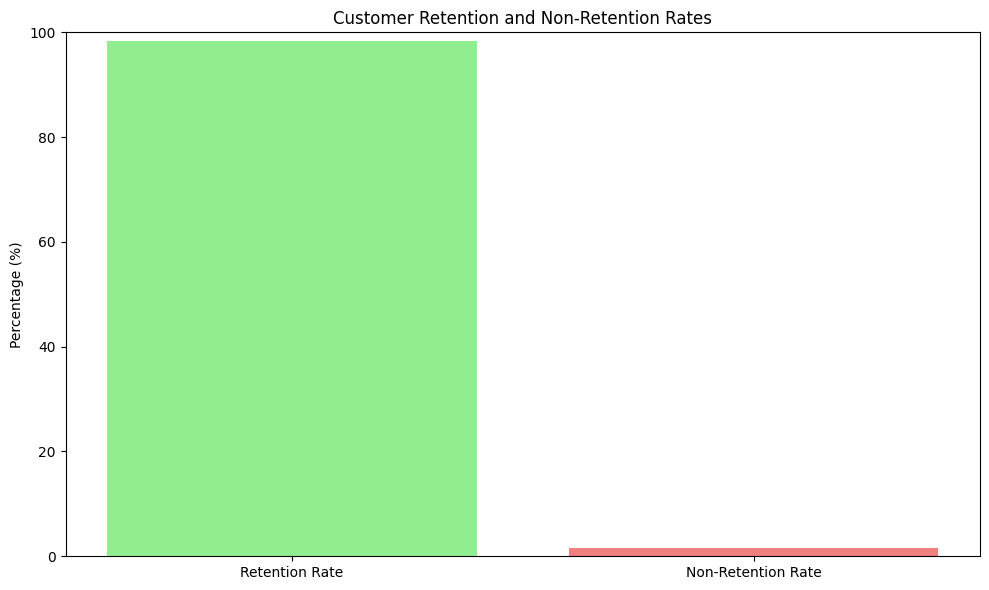

In [33]:
import matplotlib.pyplot as plt

# Identify returning customers (those who made more than 1 purchase)
returning_customers = low_priced_df['Customer_ID'].value_counts()[low_priced_df['Customer_ID'].value_counts() > 1].count()

# Total number of unique customers
total_customers = low_priced_df['Customer_ID'].nunique()

# Retention rate
retention_rate = (returning_customers / total_customers) * 100

# Non-retention rate (customers who made only one purchase)
non_retention_rate = 100 - retention_rate

# Plotting Retention and Non-Retention Rates side by side
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting bars for Retention and Non-Retention
ax.bar(['Retention Rate', 'Non-Retention Rate'], [retention_rate, non_retention_rate], color=['lightgreen', 'lightcoral'])

# Print retention and non-retention rates for reference
print(f"Customer Retention Rate: {retention_rate:.2f}%")
print(f"Customer Non-Retention Rate: {non_retention_rate:.2f}%")
# Titles and labels
ax.set_title('Customer Retention and Non-Retention Rates')
ax.set_ylabel('Percentage (%)')
ax.set_ylim(0, 100)  # Set y-axis from 0 to 100%

# Display plot
plt.tight_layout()
plt.show()


# 13 Apply log transformation (adding 1 to avoid log(0))
> **Note:** Log transformation is applied to handle skewed data distributions. It reduces skewness, stabilizes variance, and minimizes the impact of outliers. Adding a small constant (e.g., 1) ensures that the transformation works even with zero values.


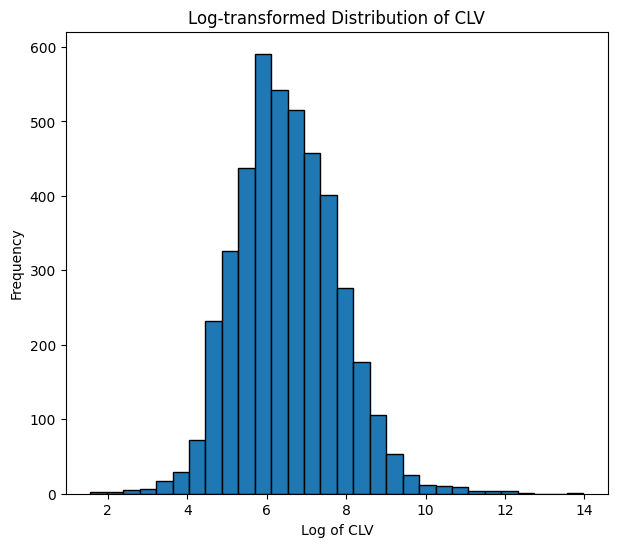

In [34]:
# Apply log transformation (adding 1 to avoid log(0))
import matplotlib.pyplot as plt
import numpy as np

# Apply log transformation (adding 1 to avoid log(0))
clv_log = np.log1p(clv)

# Create the plot
fig, ax = plt.subplots(figsize=(7, 6))  # Define the figure and axes

# Plot the transformed data
ax.hist(clv_log, bins=30, edgecolor='black')
ax.set_title('Log-transformed Distribution of CLV')
ax.set_xlabel('Log of CLV')
ax.set_ylabel('Frequency')

plt.show()


# 14 Conversion Rate

Total Visitors: 506162
Conversions: 506162
Conversion Rate: 100.0%


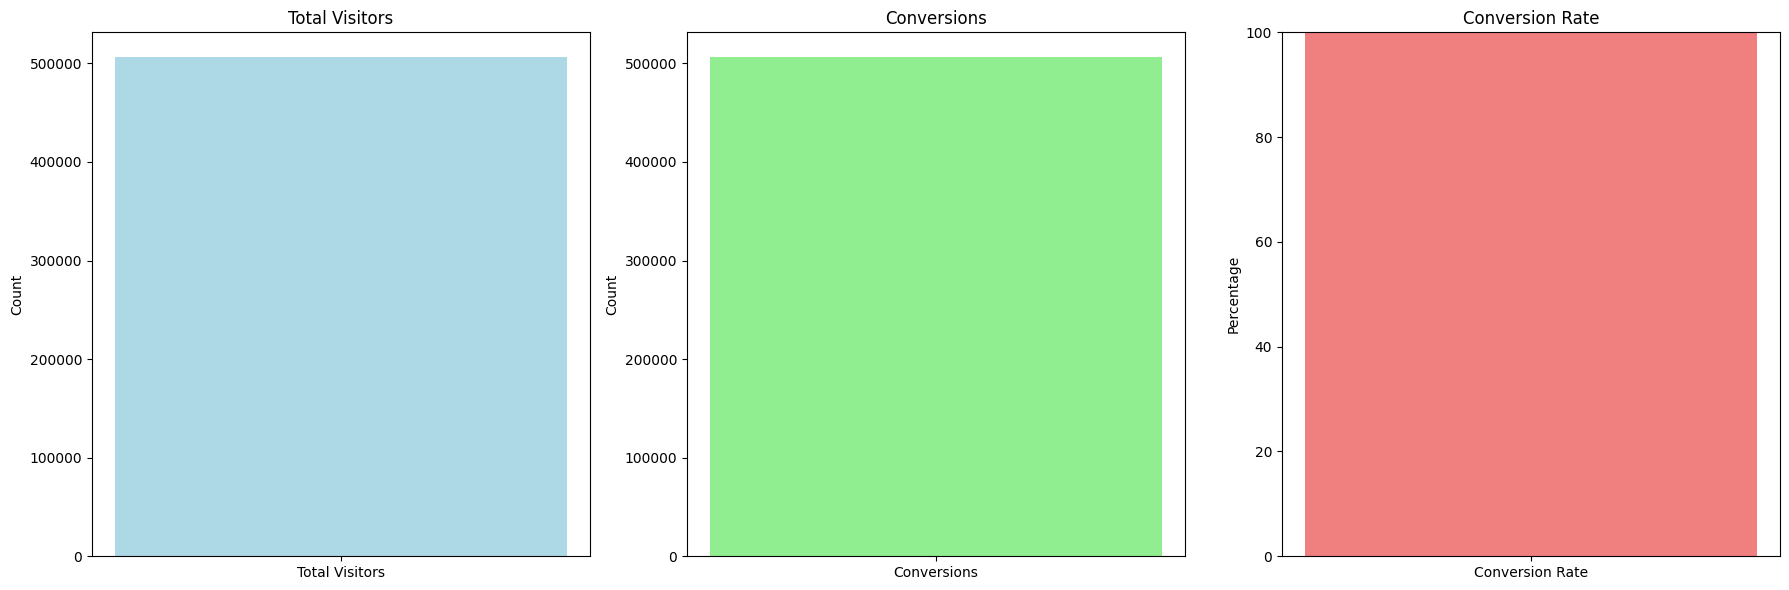

In [35]:
# Calculate the values
total_visitors = len(low_priced_df)  # Total number of rows (or users)
conversions = low_priced_df[low_priced_df['Quantity'] > 0].shape[0]  # Number of purchases (or conversions)
conversion_rate = (conversions / total_visitors) * 100

# Print the values to verify
print(f"Total Visitors: {total_visitors}")
print(f"Conversions: {conversions}")
print(f"Conversion Rate: {conversion_rate}%")

# Plotting the results side by side
fig, ax = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

# Total Visitors
ax[0].bar(['Total Visitors'], [total_visitors], color='lightblue')
ax[0].set_title('Total Visitors')
ax[0].set_ylabel('Count')

# Conversions
ax[1].bar(['Conversions'], [conversions], color='lightgreen')
ax[1].set_title('Conversions')
ax[1].set_ylabel('Count')

# Conversion Rate
ax[2].bar(['Conversion Rate'], [conversion_rate], color='lightcoral')
ax[2].set_title('Conversion Rate')
ax[2].set_ylabel('Percentage')
ax[2].set_ylim(0, 100)  # Set the y-axis to go from 0 to 100% for the rate

plt.tight_layout()
plt.show()


# 15 Average Order Value

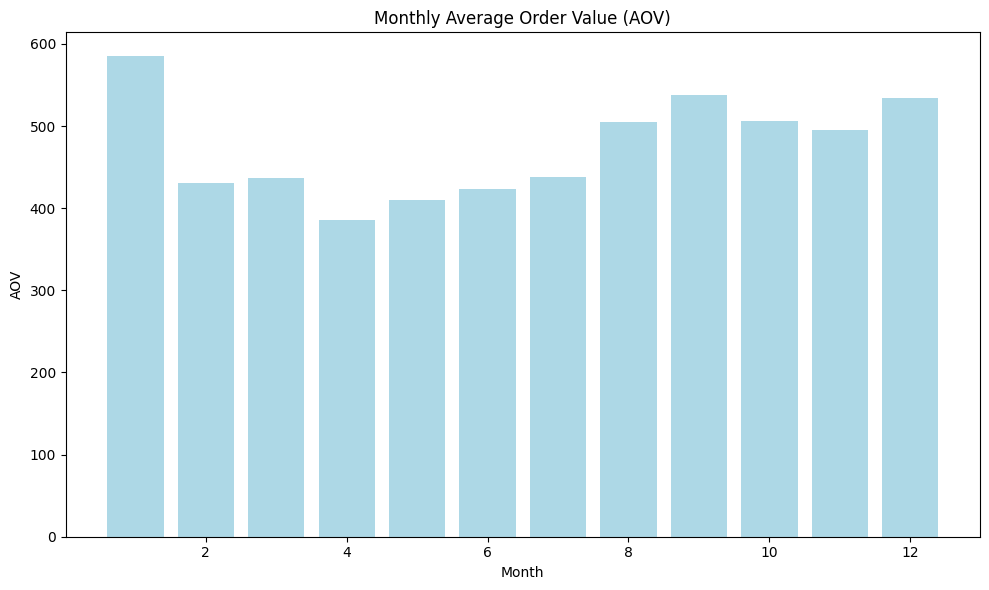

In [36]:
# Calculate Monthly AOV
low_priced_df['Month'] = low_priced_df['Date'].dt.month
monthly_aov = low_priced_df.groupby('Month').agg(
    AOV=('Total_Revenue', 'sum'),
    Orders=('Invoice_No', 'nunique')
)
monthly_aov['AOV'] = monthly_aov['AOV'] / monthly_aov['Orders']

# Plotting Monthly AOV
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(monthly_aov.index, monthly_aov['AOV'], color='lightblue')
ax.set_title('Monthly Average Order Value (AOV)')
ax.set_xlabel('Month')
ax.set_ylabel('AOV')

plt.tight_layout()
plt.show()


# 16 Sales Growth

Sales Growth from last month: -7.32%


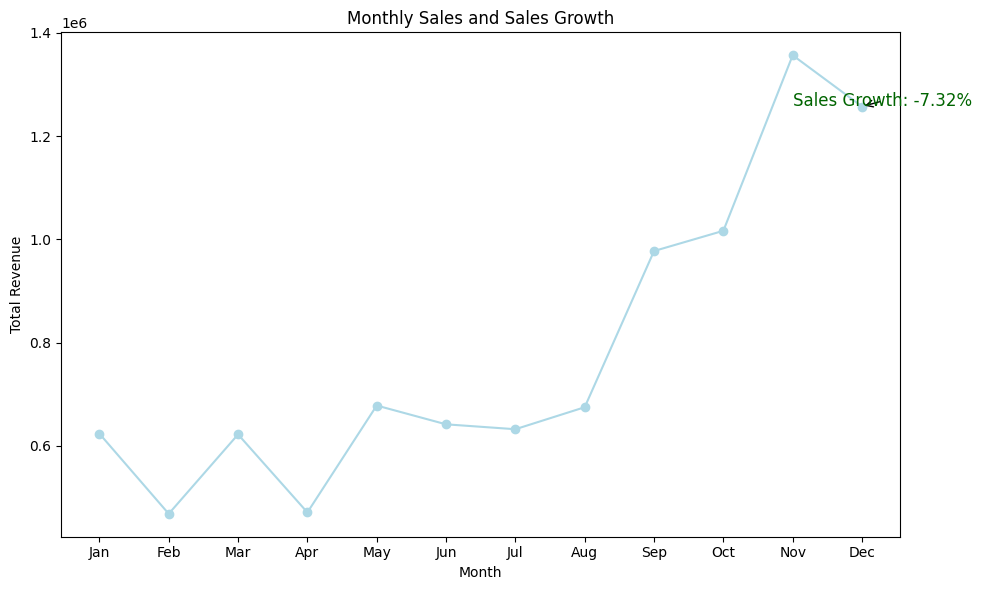

In [37]:
import matplotlib.pyplot as plt

# Assuming you have a 'Date' column in datetime format
low_priced_df['Month'] = low_priced_df['Date'].dt.month

# Group by month and calculate total revenue
monthly_sales = low_priced_df.groupby('Month')['Total_Revenue'].sum()

# Calculate sales growth between the last two months
sales_growth = ((monthly_sales.iloc[-1] - monthly_sales.iloc[-2]) / monthly_sales.iloc[-2]) * 100

# Print sales growth for reference
print(f"Sales Growth from last month: {sales_growth:.2f}%")

# Plotting Monthly Sales and Sales Growth
fig, ax = plt.subplots(figsize=(10, 6))

# Plot monthly sales as a line plot
ax.plot(monthly_sales.index, monthly_sales.values, marker='o', color='lightblue', label='Monthly Sales')

# Annotate the sales growth between the last two months
ax.annotate(f"Sales Growth: {sales_growth:.2f}%", 
            xy=(monthly_sales.index[-1], monthly_sales.values[-1]), 
            xytext=(monthly_sales.index[-1]-1, monthly_sales.values[-1]+1000),
            arrowprops=dict(facecolor='black', arrowstyle="->"),
            fontsize=12, color='darkgreen')

# Titles and labels
ax.set_title('Monthly Sales and Sales Growth')
ax.set_xlabel('Month')
ax.set_ylabel('Total Revenue')
ax.set_xticks(monthly_sales.index)  # Set month labels
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Display the plot
plt.tight_layout()
plt.show()

